# Решение Задачи "Предсказание стоимости услуг репетитора"

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/competitions/tutors-lessons-prices-prediction'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  elenami15


Your Kaggle Key:

  ········


100%|██████████| 2.56M/2.56M [00:04<00:00, 546kB/s]


Extracting archive .\tutors-lessons-prices-prediction/tutors-lessons-prices-prediction.zip to .\tutors-lessons-prices-prediction


## Исследование и предварительная обработка данных

In [ ]:
# иморитирование всех необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from ast import literal_eval
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import warnings
from sklearn.model_selection import GridSearchCV

In [ ]:
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')
sample_submit = pd.read_csv('sample_submit.csv')

## Исследование и предобработка данных

In [ ]:
train.head(5)

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


In [ ]:
test.head(5)

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,2,matematika,Репетитор по математике Епихина Елена Вячесла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0,0,Преподаватель высшей квалификационный ...,Репетитор не предоставил информаци...,"Тамбовский ордена ""Знак Почёта"" государственн...","Год окончания: 1987, Факультет: Математика, С...",...,NaN,"Университетский преподаватель, Школьный препо...",36 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."
3,3,matematika,Репетитор по математике Касаткин Денис Евгень...,"['Школьная программа', 'Подготовка к ОГЭ', 'Hi...",4,11,"Объясняю ровно столько, сколько надо. ...",NaN,Тюменский государственный университет,"Год окончания: 2022, Факультет: факультет меж...",...,NaN,Студент,3 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,4,informatika,Репетитор по информатике Логвинов Артём Алекса...,['Подготовка к ЕГЭ'],0,0,"Подготовлю к ЕГЭ, уроки через любую уд...",Репетитор не предоставил информаци...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Программная и...",...,NaN,Студент,1 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."


In [ ]:
sample_submit.head(5)

,index,mean_price
0,0,19.878115
1,1,0.903784
2,2,19.925667
3,3,22.705076
4,4,33.187842


In [ ]:
print(train.shape)
print(test.shape)
print(sample_submit.shape)

(4548, 28)
(1516, 27)
(1516, 2)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


<Axes: ylabel='mean_price'>

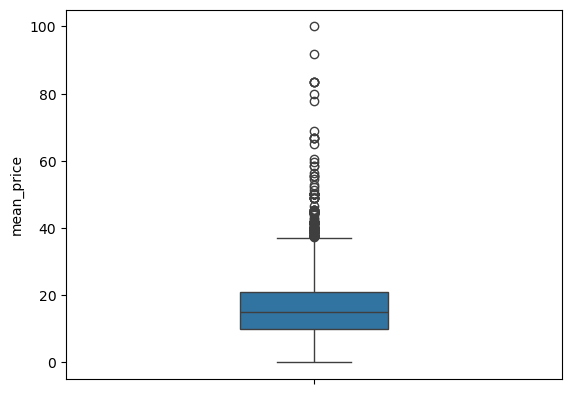

In [ ]:
sns.boxplot(train['mean_price'], width=0.3)

Мы видим, что в данных много пропусков, в датасете присутствует много категориальных переменных, а также в целевой переменной присутствуют выбросы. Посмотрим теперь каждый признак по порядку, начнем с колонки 'предмет'.

In [ ]:
train['предмет'].value_counts()

предмет
matematika     3685
informatika     863
Name: count, dtype: int64

В переменной 'предмет' всего две категории, закодируем переменную таким образом, что будут созданы 2 новые колонки matematika и informatika с булевыми значениями true и false.

In [ ]:
train = pd.get_dummies(train, columns=['предмет'])
train.head(2)

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price,предмет_informatika,предмет_matematika
0,0,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,False,True
1,1,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,False,True


In [ ]:
train['status'].value_counts()

status
Частный преподаватель                                                         2345
Студент                                                                       1288
Школьный преподаватель                                                         558
Университетский преподаватель                                                  129
Частный преподаватель, Студент                                                  92
Университетский преподаватель, Школьный преподаватель                           47
Аспирант или ординатор очной формы обучения                                     45
Аспирант или ординатор очной формы обучения, Частный преподаватель              15
Университетский преподаватель, Аспирант или ординатор очной формы обучения      13
Школьный преподаватель, Аспирант или ординатор очной формы обучения              3
Name: count, dtype: int64

В столбце 'status' есть повторяющиеся через запятую категории, разобъем их на столбцы.

In [ ]:
dummies_status = train['status'].str.get_dummies(sep=',')
dummies_status = dummies_status.add_prefix('status_')

train = pd.concat([train, dummies_status], axis = 1)
train.head(2)

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,Ученое звание 2,categories,mean_price,предмет_informatika,предмет_matematika,status_ Аспирант или ординатор очной формы обучения,status_ Студент,status_ Университетский преподаватель,status_ Частный преподаватель,status_ Школьный преподаватель
0,0,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,False,True,0,0,1,0,0
1,1,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,False,True,0,0,0,0,1


In [ ]:
train['experience'].unique()

array([' 31 год ', ' 8 лет ', ' 11 лет ', ' 5 лет ', ' 19 лет ',
       ' 7 лет ', ' 27 лет ', ' 9 лет ', ' 38 лет ', ' 28 лет ',
       ' 17 лет ', ' 6 лет ', ' 13 лет ', ' 45 лет ', ' 4 года ',
       ' 3 года ', ' 10 лет ', ' 2 года ', ' 14 лет ', ' 20 лет ',
       ' 18 лет ', ' 32 года ', ' 16 лет ', ' 21 год ', ' 15 лет ',
       ' 12 лет ', ' 1 год ', ' 24 года ', ' 29 лет ', ' 22 года ',
       ' 39 лет ', ' 23 года ', ' 25 лет ', ' 34 года ', nan, ' 33 года ',
       ' 43 года ', ' 36 лет ', ' 40 лет ', ' 26 лет ', ' 41 год ',
       ' 30 лет ', ' 42 года ', ' 37 лет ', ' 35 лет ', ' 47 лет ',
       ' 44 года ', ' 53 года ', ' 55 лет ', ' 68 лет ', ' 48 лет ',
       ' 52 года ', ' 50 лет ', ' 46 лет ', ' 51 год ', ' 54 года '],
      dtype=object)

В колонке 'experience' оставим только числовые данные.

In [ ]:
train['experience'] = train['experience'].str.replace(r"[^\d\.]", "", regex=True)
train['experience'] = train['experience'].astype('float64')
train.head(2)

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,Ученое звание 2,categories,mean_price,предмет_informatika,предмет_matematika,status_ Аспирант или ординатор очной формы обучения,status_ Студент,status_ Университетский преподаватель,status_ Частный преподаватель,status_ Школьный преподаватель
0,0,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,False,True,0,0,1,0,0
1,1,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,False,True,0,0,0,0,1


In [ ]:
train['categories']

0       ['Школьники с 5 по 9 класс', 'Школьники с 10 п...
1       ['Школьники с 5 по 9 класс', 'Школьники с 10 п...
2       ['Школьники с 5 по 9 класс', 'Школьники с 10 п...
3       ['Школьники с 1 по 4 класс', 'Школьники с 5 по...
4       ['Школьники с 5 по 9 класс', 'Школьники с 10 п...
                              ...                        
4543    ['Школьники с 1 по 4 класс', 'Школьники с 5 по...
4544                         ['Школьники с 5 по 9 класс']
4545    ['Школьники с 5 по 9 класс', 'Школьники с 10 п...
4546    ['Школьники с 5 по 9 класс', 'Школьники с 10 п...
4547    ['Школьники с 1 по 4 класс', 'Школьники с 5 по...
Name: categories, Length: 4548, dtype: object

Для преобразования переменной 'categories' воспользуемся методом MultiLabelBinarizer.

In [ ]:
train['categories'] = train['categories'].apply(lambda s: list(ast.literal_eval(s)))
print(type(train.loc[0, 'categories']))
train.loc[0, 'categories']

<class 'list'>


['Школьники с 5 по 9 класс',
 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']

In [ ]:
mlb = MultiLabelBinarizer()

genres_encoded = mlb.fit_transform(train['categories'])
genres_encoded

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [ ]:
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_).add_prefix('categories_')

train = pd.concat([train, genres_df], axis=1)
genres_df

,categories_Взрослые кроме абитуриентов и студентов,categories_Взрослые кроме абитуриентов и студентов в паре,categories_Взрослые кроме абитуриентов и студентов группа,categories_Дошкольники,categories_Дошкольники в паре,categories_Дошкольники группа,categories_Студенты университетов,categories_Студенты университетов в паре,categories_Школьники с 1 по 4 класс,categories_Школьники с 1 по 4 класс в паре,categories_Школьники с 1 по 4 класс группа,"categories_Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","categories_Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","categories_Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",categories_Школьники с 5 по 9 класс,categories_Школьники с 5 по 9 класс в паре,categories_Школьники с 5 по 9 класс группа
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4545,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4546,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
train.head(2)

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,categories_Студенты университетов в паре,categories_Школьники с 1 по 4 класс,categories_Школьники с 1 по 4 класс в паре,categories_Школьники с 1 по 4 класс группа,"categories_Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","categories_Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","categories_Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",categories_Школьники с 5 по 9 класс,categories_Школьники с 5 по 9 класс в паре,categories_Школьники с 5 по 9 класс группа
0,0,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,0,0,0,0,1,0,0,1,0,0
1,1,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
train['tutor_head_tags']

0       ['Школьная программа', 'Подготовка к ЕГЭ', 'По...
1       ['Школьная программа', 'Подготовка к ЕГЭ', 'По...
2       ['Школьная программа', 'Подготовка к ЕГЭ', 'По...
3       ['Школьная программа', 'Математический анализ'...
4       ['Школьная программа', 'Подготовка к ЕГЭ', 'По...
                              ...                        
4543    ['Школьная программа', 'Математический анализ'...
4544    ['Школьная программа', 'Подготовка к ЕГЭ', 'По...
4545    ['Школьная программа', 'Подготовка к ЕГЭ', 'По...
4546    ['Школьная программа', 'Подготовка к ЕГЭ', 'По...
4547    ['Школьная программа', 'Подготовка к ОГЭ', 'По...
Name: tutor_head_tags, Length: 4548, dtype: object

Преобразуем переменную 'tutor_head_tags' также, как ранее переменную 'categories' - с помощью метода MultiLabelBinarizer.

In [ ]:
train['tutor_head_tags'] = train['tutor_head_tags'].apply(lambda s: list(ast.literal_eval(s)))

print(type(train.loc[0, 'tutor_head_tags']))
train.loc[0, 'tutor_head_tags']

<class 'list'>


['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ']

In [ ]:
mlb_tags = MultiLabelBinarizer()

tutor_head_tags_encoded = mlb_tags.fit_transform(train['tutor_head_tags'])
tutor_head_tags_encoded_df = pd.DataFrame(tutor_head_tags_encoded, columns=mlb_tags.classes_).add_prefix('tutor_head_tags__')
train = pd.concat([train, tutor_head_tags_encoded_df], axis=1)

tutor_head_tags_encoded_df

,tutor_head_tags__A-level,tutor_head_tags__Elementary Mathematics in English,tutor_head_tags__GMAT (математическая часть),tutor_head_tags__Higher Mathematics in English - высшая математика на английском языке,tutor_head_tags__Mathematik auf Deutsch,tutor_head_tags__SAT (математическая часть),tutor_head_tags__Аналитическая геометрия,tutor_head_tags__Дискретная математика,tutor_head_tags__Дифференциальные уравнения,tutor_head_tags__Линейная алгебра,tutor_head_tags__Математическая логика,tutor_head_tags__Математический анализ,tutor_head_tags__Подготовка к ЕГЭ,tutor_head_tags__Подготовка к ОГЭ,tutor_head_tags__Подготовка к олимпиадам,tutor_head_tags__ТФКП,tutor_head_tags__Теория вероятности и мат. статистика,tutor_head_tags__Уравнения мат физики,tutor_head_tags__Школьная программа
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,0,1
4544,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
4545,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
4546,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


In [ ]:
train.head(2)

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,tutor_head_tags__Линейная алгебра,tutor_head_tags__Математическая логика,tutor_head_tags__Математический анализ,tutor_head_tags__Подготовка к ЕГЭ,tutor_head_tags__Подготовка к ОГЭ,tutor_head_tags__Подготовка к олимпиадам,tutor_head_tags__ТФКП,tutor_head_tags__Теория вероятности и мат. статистика,tutor_head_tags__Уравнения мат физики,tutor_head_tags__Школьная программа
0,0,Репетитор по математике Емельянова Марина Вла...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,0,0,0,1,1,0,0,0,0,1
1,1,Репетитор по математике Назарова Анастасия Ан...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
train['description'].unique()

array(['        Репетитор не предоставил о себе дополнительных сведений    ',
       '        Выезд за город: Балашиха-1, Балашиха-2, Балашиха-3, Реутов.Методика преподавания: индивидуальный подход в зависимости от знаний, имеющихся (или не имеющихся) у ребенка.Преподавание теоретической основы и отработка решения практических задач формата ГИА, ЕГЭ.Средние значения результатов ЕГЭ учеников (2015-2020 годы): 70-100 баллов.',
       "        \xa0Здравствуйте! Меня зовут Елизавета, окончила бакалавриат физического факультета Санкт-Петербургского Государственного Университета ('22). За время преподавания научилась находить подход к разным ученикам и доступно излагать материал. За последний год подготовила несколько ребят к ОГЭ по математике (4,5) и физике (4), а также к ЕГЭ по математике (84 балла - 3/4 первичных за задание с параметром). Имею опыт подготовки студентов 1-3 курса к экзаменам (математический анализ, дифференциальные уравнения, высшая математика, общая физика)Подкатегорию мо

Колонку 'description' заполним следующим образом: если есть сведения от репетитора проставляем 1, если нет - 0

In [ ]:
train['description'] = train['description'].apply(
    lambda x: 0 if isinstance(x, str) and x.strip() == 'Репетитор не предоставил о себе дополнительных сведений' else 1
)
train['description']

0       0
1       0
2       1
3       1
4       1
       ..
4543    1
4544    1
4545    1
4546    1
4547    1
Name: description, Length: 4548, dtype: int64

In [ ]:
train.head(2)

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,tutor_head_tags__Линейная алгебра,tutor_head_tags__Математическая логика,tutor_head_tags__Математический анализ,tutor_head_tags__Подготовка к ЕГЭ,tutor_head_tags__Подготовка к ОГЭ,tutor_head_tags__Подготовка к олимпиадам,tutor_head_tags__ТФКП,tutor_head_tags__Теория вероятности и мат. статистика,tutor_head_tags__Уравнения мат физики,tutor_head_tags__Школьная программа
0,0,Репетитор по математике Емельянова Марина Вла...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",5.0,2,0,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,0,0,0,1,1,0,0,0,0,1
1,1,Репетитор по математике Назарова Анастасия Ан...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",4.0,7,0,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
train['experience_desc']

0                                                     NaN
1                                                     NaN
2                           Московская Школа (учитель ...
3                                                     NaN
4                            преподавателем           ...
                              ...                        
4543                                                  NaN
4544                        Учитель информатики в школ...
4545                Репетитор не предоставил информаци...
4546                         – полгода            Изна...
4547                Репетитор не предоставил информаци...
Name: experience_desc, Length: 4548, dtype: object

In [ ]:
train['Ученая степень 1'].unique()

array([nan, ' кандидат физико-математических наук ',
       ' кандидат технических наук ',
       ' Кандидат физико-математических наук ',
       ' Кандидат технических наук ', ' кандидат биологических наук ',
       ' доктор физико-математических наук ',
       ' Кандидат химических наук ', ' Доктор технических наук ',
       ' Доктор физико-математических наук ',
       ' Кандидат педагогических наук ', ' ',
       ' кандидат сельскохозяйственных наук ',
       ' кандидат экономических наук '], dtype=object)

In [ ]:
train['Ученая степень 1'].value_counts()

Ученая степень 1
Кандидат технических наук               22
кандидат физико-математических наук     20
Кандидат физико-математических наук     17
кандидат технических наук                6
Доктор технических наук                  2
Кандидат педагогических наук             2
кандидат биологических наук              1
доктор физико-математических наук        1
Кандидат химических наук                 1
Доктор физико-математических наук        1
                                         1
кандидат сельскохозяйственных наук       1
кандидат экономических наук              1
Name: count, dtype: int64

In [ ]:
train['Ученое звание 1'].unique()

array([nan, ' доцент ', ' старший научный сотрудник ', ' профессор ',
       ' Доцент ', ' Профессор ', ' Старший научный сотрудник ', ' '],
      dtype=object)

In [ ]:
train['Ученое звание 1'].value_counts()

Ученое звание 1
Доцент                        13
доцент                         9
старший научный сотрудник      8
Старший научный сотрудник      2
профессор                      1
Профессор                      1
                               1
Name: count, dtype: int64

In [ ]:
train['Ученая степень 2'].unique()

array([nan, ' '], dtype=object)

In [ ]:
train['Ученая степень 2'].value_counts()

Ученая степень 2
    1
Name: count, dtype: int64

In [ ]:
train['Ученое звание 2'].unique()

array([nan, ' '], dtype=object)

In [ ]:
train['Ученое звание 2'].value_counts()

Ученое звание 2
    1
Name: count, dtype: int64

В колонках Ученое звание 2 и Ученая степень 2 нет информации, их можно удалить. Колонки Ученое звание 1 и Ученая степень 1 с учетом малого количества значений закодируем следующим образом: если есть какое-либо ученое звание или степень, тогда 1, иначе - 0.

In [ ]:
train['Ученая степень 1'] = train['Ученая степень 1'].apply(
    lambda x: 0 if pd.isna(x) else 1
)
train['Ученая степень 1']

0       0
1       0
2       0
3       0
4       0
       ..
4543    0
4544    0
4545    0
4546    0
4547    0
Name: Ученая степень 1, Length: 4548, dtype: int64

In [ ]:
train['Ученое звание 1'] = train['Ученое звание 1'].apply(
    lambda x: 0 if pd.isna(x) else 1
)
train['Ученое звание 1']

0       0
1       0
2       0
3       0
4       0
       ..
4543    0
4544    0
4545    0
4546    0
4547    0
Name: Ученое звание 1, Length: 4548, dtype: int64

In [ ]:
train = train.drop(columns=['Ученая степень 2', 'Ученое звание 2'])

Удалим также колонки с описаниями опыта и образования.

In [ ]:
train = train.drop(columns=['experience_desc', 'Desc_Education_1', 'Desc_Education_2', 'Desc_Education_3',
                            'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6'])
train.head()

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,Education_1,Education_2,Education_3,Education_4,...,tutor_head_tags__Линейная алгебра,tutor_head_tags__Математическая логика,tutor_head_tags__Математический анализ,tutor_head_tags__Подготовка к ЕГЭ,tutor_head_tags__Подготовка к ОГЭ,tutor_head_tags__Подготовка к олимпиадам,tutor_head_tags__ТФКП,tutor_head_tags__Теория вероятности и мат. статистика,tutor_head_tags__Уравнения мат физики,tutor_head_tags__Школьная программа
0,0,Репетитор по математике Емельянова Марина Вла...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",5.0,2,0,Томский государственный университет им. В.В. ...,NaN,NaN,NaN,...,0,0,0,1,1,0,0,0,0,1
1,1,Репетитор по математике Назарова Анастасия Ан...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",4.0,7,0,Вологодский государственный педагогический ун...,Череповецкий государственный университет,NaN,NaN,...,0,0,0,1,1,0,0,0,0,1
2,2,Репетитор по информатике Мотроненко Инна Конст...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",0.0,0,1,Московский городской педагогический университет,Московский городской педагогический университ...,Российская таможенная академия,NaN,...,0,0,0,1,1,0,0,0,0,1
3,3,Репетитор по математике Логинова Елизавета Ал...,"[Школьная программа, Математический анализ, По...",4.0,19,1,Санкт-Петербургский государственный университет,NaN,NaN,NaN,...,1,0,1,1,1,0,0,1,0,1
4,4,Репетитор по математике Харланов Олег Викторо...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",0.0,0,1,Приазовский государственный технический униве...,NaN,NaN,NaN,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
train['Education_1'].value_counts()

Education_1
 Санкт-Петербургский государственный университет                                                      176
 Санкт-Петербургский государственный политехнический университет                                       95
 Российский государственный педагогический университет имени А. И. Герцена                             78
Репетитор не предоставил информацию об образовании                                                     75
 МГТУ им. Н.Э. Баумана                                                                                 68
                                                                                                     ... 
 Орский гуманитарно-технологический институт (филиал) Оренбургского государственного университета       1
 Уральский федеральный университет имени первого президента Б. Н. Ельцина                               1
 Новокузнецкий государственный педагогический институт                                                  1
 К(П)ФУ                           

С колонками Education поступим следующим образом: закодируем все шесть колонок так, что если есть образование, то проставим 1, если нет - 0, и соединим все значения в столбец количество образований Count_Education. Ненужные колонки удалим.

In [ ]:
train['Education_1'] = train['Education_1'].apply(
    lambda x: 0 if pd.isna(x) else 1
)
train['Education_2'] = train['Education_2'].apply(
    lambda x: 0 if pd.isna(x) else 1
)
train['Education_3'] = train['Education_3'].apply(
    lambda x: 0 if pd.isna(x) else 1
)
train['Education_4'] = train['Education_4'].apply(
    lambda x: 0 if pd.isna(x) else 1
)
train['Education_5'] = train['Education_5'].apply(
    lambda x: 0 if pd.isna(x) else 1
)
train['Education_6'] = train['Education_6'].apply(
    lambda x: 0 if pd.isna(x) else 1
)

In [ ]:
columns_to_sum = ['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6']
train['Count_Education'] = train[columns_to_sum].sum(axis=1)
train['Count_Education']

0       1
1       2
2       3
3       1
4       1
       ..
4543    1
4544    1
4545    1
4546    1
4547    1
Name: Count_Education, Length: 4548, dtype: int64

In [ ]:
train = train.drop(columns=['Education_1', 'Education_2', 'Education_3',
                            'Education_4', 'Education_5', 'Education_6'])
train.head()

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,Ученая степень 1,Ученое звание 1,status,experience,...,tutor_head_tags__Математическая логика,tutor_head_tags__Математический анализ,tutor_head_tags__Подготовка к ЕГЭ,tutor_head_tags__Подготовка к ОГЭ,tutor_head_tags__Подготовка к олимпиадам,tutor_head_tags__ТФКП,tutor_head_tags__Теория вероятности и мат. статистика,tutor_head_tags__Уравнения мат физики,tutor_head_tags__Школьная программа,Count_Education
0,0,Репетитор по математике Емельянова Марина Вла...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",5.0,2,0,0,0,Университетский преподаватель,31.0,...,0,0,1,1,0,0,0,0,1,1
1,1,Репетитор по математике Назарова Анастасия Ан...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",4.0,7,0,0,0,Школьный преподаватель,8.0,...,0,0,1,1,0,0,0,0,1,2
2,2,Репетитор по информатике Мотроненко Инна Конст...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",0.0,0,1,0,0,Школьный преподаватель,11.0,...,0,0,1,1,0,0,0,0,1,3
3,3,Репетитор по математике Логинова Елизавета Ал...,"[Школьная программа, Математический анализ, По...",4.0,19,1,0,0,Частный преподаватель,5.0,...,0,1,1,1,0,0,1,0,1,1
4,4,Репетитор по математике Харланов Олег Викторо...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",0.0,0,1,0,0,Частный преподаватель,19.0,...,0,0,1,1,0,0,0,0,1,1


Удалим оставшиеся ненужные категориальные столбцы.

In [ ]:
train = train.drop(columns=['ФИО', 'tutor_head_tags', 'status', 'categories'])
train.head()

,Unnamed: 0,tutor_rating,tutor_reviews,description,Ученая степень 1,Ученое звание 1,experience,mean_price,предмет_informatika,предмет_matematika,...,tutor_head_tags__Математическая логика,tutor_head_tags__Математический анализ,tutor_head_tags__Подготовка к ЕГЭ,tutor_head_tags__Подготовка к ОГЭ,tutor_head_tags__Подготовка к олимпиадам,tutor_head_tags__ТФКП,tutor_head_tags__Теория вероятности и мат. статистика,tutor_head_tags__Уравнения мат физики,tutor_head_tags__Школьная программа,Count_Education
0,0,5.0,2,0,0,0,31.0,16.666667,False,True,...,0,0,1,1,0,0,0,0,1,1
1,1,4.0,7,0,0,0,8.0,11.666667,False,True,...,0,0,1,1,0,0,0,0,1,2
2,2,0.0,0,1,0,0,11.0,23.333333,True,False,...,0,0,1,1,0,0,0,0,1,3
3,3,4.0,19,1,0,0,5.0,0.116667,False,True,...,0,1,1,1,0,0,1,0,1,1
4,4,0.0,0,1,0,0,19.0,16.666667,False,True,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 52 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Unnamed: 0                                                                                  4548 non-null   int64  
 1   tutor_rating                                                                                3959 non-null   float64
 2   tutor_reviews                                                                               4548 non-null   int64  
 3   description                                                                                 4548 non-null   int64  
 4   Ученая степень 1                                                                            4548 non-null   int64  
 5   Ученое звание 1                          

В данных есть пропуски, посмотрим подробнее и заполним пропуски нулями.

In [ ]:
total_nan = train.isnull().sum().sum()
print(f"Общее количество NaN: {total_nan}")

Общее количество NaN: 614


In [ ]:
nan_columns = train.isna().any()

columns_with_nan = nan_columns[nan_columns].index.tolist()
print("Столбцы с NaN значениями:", columns_with_nan)

nan_counts = train.isna().sum()
print("\nКоличество NaN в каждом столбце:\n", nan_counts[nan_counts > 0])

Столбцы с NaN значениями: ['tutor_rating', 'experience']

Количество NaN в каждом столбце:
 tutor_rating    589
experience       25
dtype: int64


In [ ]:
train['tutor_rating'] = train['tutor_rating'].fillna(0)
train['experience'] = train['experience'].fillna(0)

Выполним все те же шаги на данных test.

In [ ]:
def preprocess_dataframe(df):
    df = pd.get_dummies(df, columns=['предмет'])

    dummies_status = df['status'].str.get_dummies(sep=',')
    dummies_status = dummies_status.add_prefix('status_')
    df = pd.concat([df, dummies_status], axis=1)

    df['experience'] = df['experience'].str.replace(r'[^\d\.]', '', regex=True)
    df['experience'] = df['experience'].astype('float64')

    df['categories'] = df['categories'].apply(lambda s: list(literal_eval(s)))

    mlb = MultiLabelBinarizer()
    genres_encoded = mlb.fit_transform(df['categories'])
    genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_).add_prefix('categories_')
    df = pd.concat([df, genres_df], axis=1)

    df['tutor_head_tags'] = df['tutor_head_tags'].apply(lambda s: list(literal_eval(s)))
    mlb_tags = MultiLabelBinarizer()
    tutor_head_tags_encoded = mlb_tags.fit_transform(df['tutor_head_tags'])
    tutor_head_tags_encoded_df = pd.DataFrame(tutor_head_tags_encoded, columns=mlb_tags.classes_).add_prefix('tutor_head_tags__')
    df = pd.concat([df, tutor_head_tags_encoded_df], axis=1)

    df['description'] = df['description'].apply(
        lambda x: 0 if isinstance(x, str) and x.strip() == 'Репетитор не предоставил о себе дополнительных сведений' else 1
    )

    df['Ученая степень 1'] = df['Ученая степень 1'].apply(lambda x: 0 if pd.isna(x) else 1)
    df['Ученое звание 1'] = df['Ученое звание 1'].apply(lambda x: 0 if pd.isna(x) else 1)

    df = df.drop(columns=[
        'Ученая степень 2',
        'Ученое звание 2',
        'experience_desc',
        'Desc_Education_1',
        'Desc_Education_2',
        'Desc_Education_3',
        'Desc_Education_4',
        'Desc_Education_5',
        'Desc_Education_6',
        'ФИО',
        'tutor_head_tags',
        'status',
        'categories'
    ])

    for col in ['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6']:
        df[col] = df[col].apply(lambda x: 0 if pd.isna(x) else 1)

    columns_to_sum = ['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6']
    df['Count_Education'] = df[columns_to_sum].sum(axis=1)

    df = df.drop(columns=['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6'])

    df = df.fillna(0)

    return df

clean_test = preprocess_dataframe(test)

Проверим, что в итоге получилось и есть ли какие-либо расхождения.

In [ ]:
print("Количество признаков в train:", len(train.columns))
print("Количество признаков в clean_test:", len(clean_test.columns))
print("Общие признаки train и clean_test:", len(set(train.columns) & set(clean_test.columns)))

Количество признаков в train: 52
Количество признаков в clean_test: 51
Общие признаки train и clean_test: 50


Видим, что есть расхождения, проверим откуда и исправим.

In [ ]:
set(train.columns) - set(clean_test.columns)

{'categories_Взрослые кроме абитуриентов и студентов группа', 'mean_price'}

In [ ]:
set(clean_test.columns) - set(train.columns)

{'categories_Студенты университетов группа'}

Добавим нули в недостающие столбцы и отсортируем их.

In [ ]:
missing_clean_test = ['categories_Взрослые кроме абитуриентов и студентов группа']
missing_train = ['categories_Студенты университетов группа']

for col in missing_clean_test:
    clean_test[col] = 0
for col in missing_train:
    train[col] = 0

clean_test = clean_test[sorted(clean_test.columns)]
train = train[sorted(train.columns)]

Еще раз проведем проверку и убедимся, что теперь нет расхождений.

In [ ]:
print("Количество признаков в train:", len(train.columns))
print("Количество признаков в clean_test:", len(clean_test.columns))
print("Общие признаки train и clean_test:", len(set(train.columns) & set(clean_test.columns)))

Количество признаков в train: 53
Количество признаков в clean_test: 52
Общие признаки train и clean_test: 52


Посмотрим теперь на значения корреляции. Мы видим, что корреляция с целевой переменной достаточно низкая.

In [ ]:
correlation_matrix = train.corr()
mean_price_corr = correlation_matrix['mean_price'].sort_values(ascending=False)
print(mean_price_corr)

mean_price                                                                                    1.000000
categories_Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре    0.174520
categories_Школьники с 5 по 9 класс в паре                                                    0.168816
description                                                                                   0.167355
tutor_head_tags__Подготовка к ЕГЭ                                                             0.163486
categories_Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты           0.163347
tutor_head_tags__Elementary Mathematics in English                                            0.160445
categories_Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа    0.139746
Ученая степень 1                                                                              0.139288
experience                                                               

## Подбор модели

In [ ]:
X = train.drop(columns=['mean_price'])
Y = train['mean_price']

Разделим данные на обучающую и тестовую выборки.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (3183, 52), (3183,)
Test dataset size: (1365, 52), (1365,)


Рассмотрим следующие модели: Дерево решений, Случайный лес, Линейная регрессия, Метод опорных векторов, K-ближайших соседей

In [ ]:
models = {
    'Decision_Tree': DecisionTreeRegressor(random_state=42),
    'Random_Forest': RandomForestRegressor(random_state=42),
    'Linear_Regression': LinearRegression(),
    'SVR': SVR(),
    'K-Neighbors': KNeighborsRegressor(),
}

Протестируем все модели.

In [ ]:
results = {}

for name, model in models.items():
    scoring = ['neg_mean_squared_error', 'r2']
    scores = cross_validate(model, X, Y, cv=5, scoring=scoring)

    results[name] = {
        'MSE': -np.mean(scores['test_neg_mean_squared_error']),
        'R²': np.mean(scores['test_r2'])
    }

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,MSE,R²
Decision_Tree,181.038683,-0.655673
Random_Forest,93.393771,0.147565
Linear_Regression,93.739862,0.147108
SVR,111.056824,-0.011942
K-Neighbors,140.534388,-0.289738


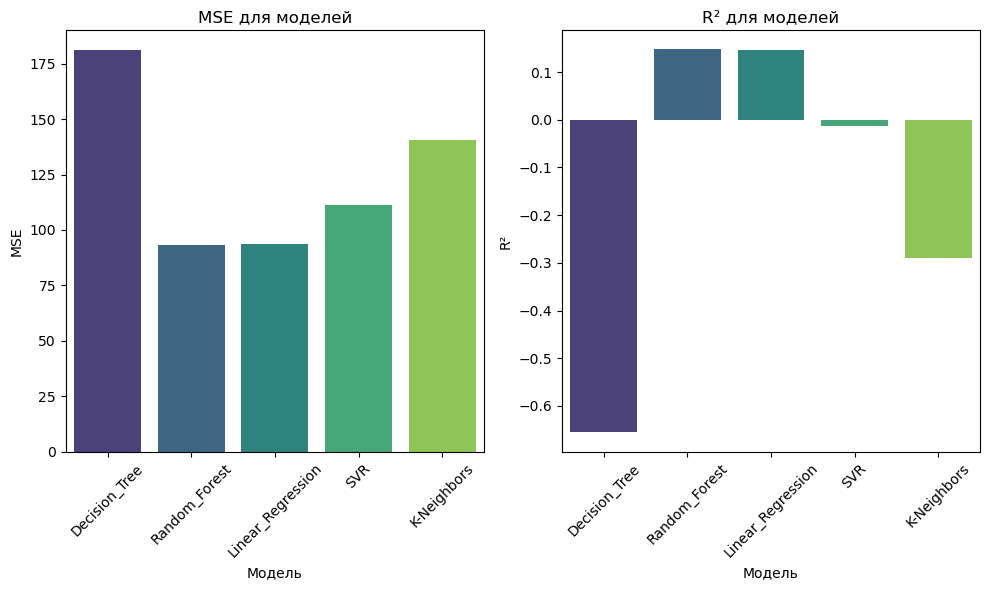

In [ ]:
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.barplot(x=results_df.index, y=results_df['MSE'], palette='viridis', ax=ax[0])
ax[0].set_title('MSE для моделей')
ax[0].set_xlabel('Модель')
ax[0].set_ylabel('MSE')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x=results_df.index, y=results_df['R²'], palette='viridis', ax=ax[1])
ax[1].set_title('R² для моделей')
ax[1].set_xlabel('Модель')
ax[1].set_ylabel('R²')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Модели показали не очень хорошие результаты, наилучшие - у моделей RandomForest и LinearRegression (LinearRegression показывает результаты немного хуже). Для улучшения модели попробуем логарифмировать целевую переменную (в том числе так как есть большие выбросы).

In [ ]:
y_train_log = np.log1p(Y)

In [ ]:
results = {}

for name, model in models.items():
    scoring = ['neg_mean_squared_error', 'r2']
    scores = cross_validate(model, X, y_train_log, cv=5, scoring=scoring)

    results[name] = {
        'MSE': -np.mean(scores['test_neg_mean_squared_error']),
        'R²': np.mean(scores['test_r2'])
    }

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,MSE,R²
Decision_Tree,1.641106,-0.992202
Random_Forest,0.909307,-0.103069
Linear_Regression,0.800516,0.029939
SVR,0.868936,-0.052523
K-Neighbors,1.215837,-0.467922


Благодаря логарифмированию целевой переменной итоговые результаты очень сильно снизились, особенно в разы снизилось значение MSE. После преобразований мы видим, что модель LinearRegression имеет наименьшее значение MSE и положительное значение R² по сравнению с другими моделями. Однако наилучший результат на Kaggle показала модель RandomForest.

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(X, Y)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Best score (MSE): {best_score:.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best score (MSE): -85.4128


In [ ]:
y_pred = best_model.predict(clean_test)

submition = pd.DataFrame(y_pred, columns=['mean_price'])
submition = submition.reset_index()
submition

,index,mean_price
0,0,18.556296
1,1,9.822196
2,2,18.633457
3,3,12.276953
4,4,10.424305
...,...,...
1511,1511,13.407149
1512,1512,25.543983
1513,1513,16.884581
1514,1514,12.861807


In [ ]:
submition.to_csv('my_submit_v2.csv', index=False)

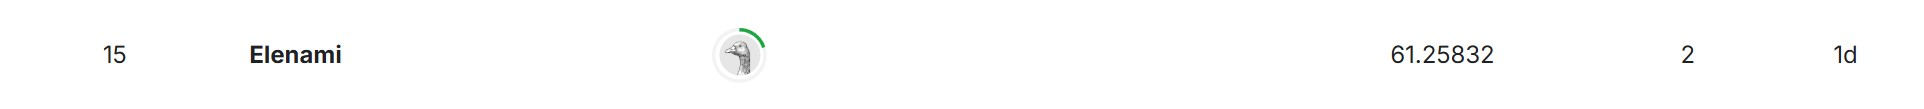

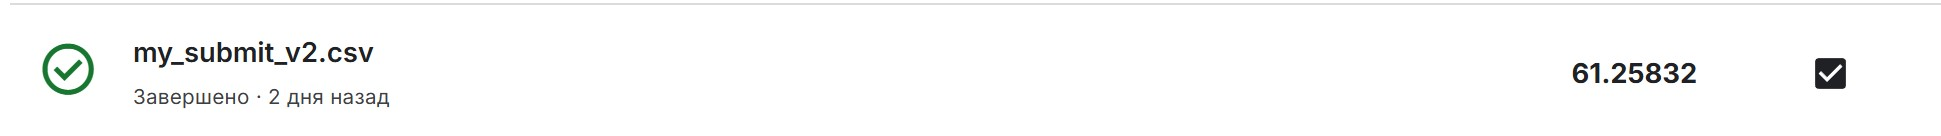